In [1]:
import sys
import os.path
import pylab as plt
from zedstat.zedstat import zedstat
import pandas as pd

In [2]:
#
# order is order of spline used for smoothing
# alpha is significance level
# prevalence is prevalence of positive class
# 
zt=zedstat(df=pd.read_csv('examples_data/roc2.csv'),
           order=3, 
           total_samples=100000,
           positive_samples=1000,
           alpha=0.1,
           prevalence=.01)

In [3]:
# compute smoothened roc and other performance measures
zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=True)
zt.usample(precision=3)
zt.getBounds()

Text(0, 0.5, 'tpr')

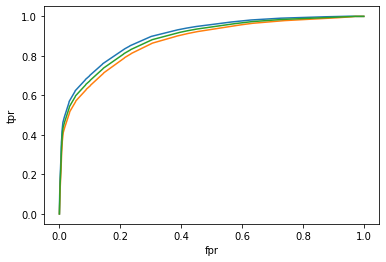

In [4]:
ax=zt.df_lim['U'].tpr.plot()
ax=zt.df_lim['L'].tpr.plot(ax=ax)
ax=zt.get().tpr.plot(ax=ax)
ax.set_ylabel('tpr')

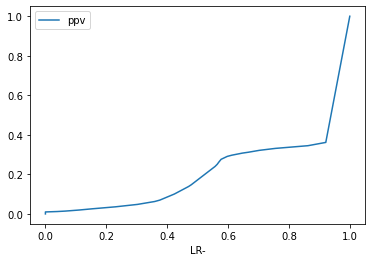

In [5]:
ax=zt.get().plot(x='LR-',y='ppv')
#ax=zt.get().plot(ax=ax,x='LR-',y='ppv')


In [6]:
# compute auc with confidence bounds
zt.auc(alpha=.001)

(0.8875903790087464, 0.914707250237766, 0.8600825842465808)

In [7]:
# required sample size
zt.samplesize(delta_auc=.1)

26.99420757849582

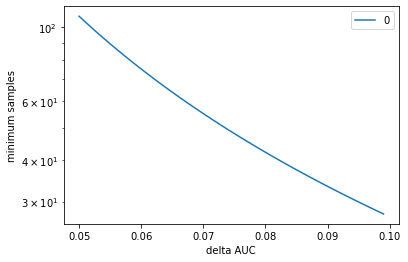

In [8]:
import numpy as np
pd.DataFrame(np.array([zt.samplesize(delta_auc=a) 
                       for a in np.arange(.05,.1,.001)]),
             np.arange(.05,.1,.001)).plot(logy=True)
plt.gca().set_xlabel('delta AUC')
plt.gca().set_ylabel('minimum samples');

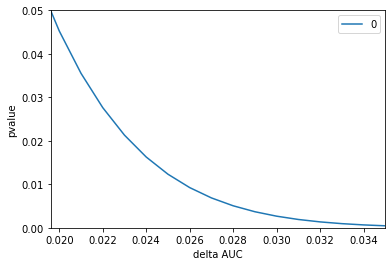

In [9]:
pd.DataFrame([zt.pvalue(delta_auc=a) for a in np.arange(0.001,.1,.001)],
             np.arange(0.001,.1,.001)).plot()
plt.gca().set_ylim(0,0.05)   
plt.gca().set_xlim(0.0196,0.035)   
plt.gca().set_xlabel('delta AUC')
plt.gca().set_ylabel('pvalue');

In [10]:
zt.operating_zone(LRminus=.65)
rf0,txt0=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=10)
rf1,txt1=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=10)
display(zt._operating_zone)
print('high precision operation:\n','\n '.join(txt0))
print('\n')
print('high recall operation:\n','\n '.join(txt1))

,fpr,tpr,ppv,acc,npv,LR+,LR-,threshold
high precision,0.008,0.358115,0.307628,0.985499,0.993506,43.99784,0.647145,0.234186
high sensitivity,0.064,0.616202,0.091559,0.932393,0.995877,10.00695,0.409831,0.031257


high precision operation:
 For every 10 positive instances
 we raise 26 flags,
 out of which 5 are true positives
 21 are false alarms
 5 cases are missed


high recall operation:
 For every 10 positive instances
 we raise 44 flags,
 out of which 6 are true positives
 38 are false alarms
 4 cases are missed


In [11]:
from zedstat.textable import tablewithbounds
tablewithbounds(zt.get(),zt.usample(zt.df_lim['U']),zt.usample(zt.df_lim['L']))

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,$0.0 \pm 0.0$,$1.0 \pm 0.850$,$0.99 \pm 0.0$,$0.99 \pm 0.0$,$59.73 \pm 27.07$,$1.0 \pm 0.0$,1.470513
0.001,$0.080 \pm 0.054$,$0.361 \pm 0.145$,$0.989 \pm -0.00$,$0.990 \pm 0.000$,$56.15 \pm 20.29$,$0.921 \pm -0.06$,0.380974
0.002,$0.139 \pm 0.061$,$0.345 \pm 0.054$,$0.988 \pm -0.00$,$0.991 \pm 0.000$,$52.20 \pm 11.65$,$0.862 \pm -0.05$,0.349475
0.003,$0.175 \pm 0.055$,$0.340 \pm 0.052$,$0.988 \pm 5.003$,$0.991 \pm 0.000$,$51.17 \pm 11.08$,$0.826 \pm -0.05$,0.332624
0.004,$0.211 \pm 0.059$,$0.336 \pm 0.062$,$0.987 \pm 0.000$,$0.992 \pm 0.000$,$50.14 \pm 12.87$,$0.791 \pm -0.06$,0.315774
...,...,...,...,...,...,...,...
0.996,$1.0 \pm 0.0$,$0.001 \pm -0.00$,$0.013 \pm 0.000$,$1.000 \pm 0.000$,$1.004 \pm 0.000$,$0.0 \pm 0.0$,0.001358
0.997,$1.0 \pm 0.0$,$0.000 \pm -0.00$,$0.012 \pm 5.267$,$1.000 \pm 0.000$,$1.003 \pm 0.000$,$0.0 \pm 0.0$,0.001356
0.998,$1.0 \pm 0.0$,$0.000 \pm -0.00$,$0.011 \pm -2.26$,$1.000 \pm 0.000$,$1.002 \pm 3.444$,$0.0 \pm 0.0$,0.001355
